In [1]:
import xarray as xr
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

In [2]:
############################
# set up 
############################
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRLradrefl_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_CTRL3D_maxW.nc'

#
# v1p
#
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_scale_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_scale_maxW.nc'

#
# v2p0 and v2p2 and v2p3
#
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_maxW.nc'

#
# v2p1
#
#feature_data    = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_95th_REFL.nc'
#label_data      = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_95th_maxW.nc'

#
# v3p0
#
#feature_data          = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_QR_2000m_AGL.nc'
#label_data            = '/glade/work/hardt/ds612/2000-2013_June-Sept_DS128_W_2000m_AGL.nc'

#
# v4p0
#
feature_data          = '/glade/work/hardt/ds612/2000-2013_June-Sept_QRAIN_INTERP_AGL_0to7km_at_500m_steps.nc'
label_data            = '/glade/work/hardt/ds612/2000-2013_June-Sept_W_INTERP_AGL_0to7km_at_500m_steps.nc'

model_root      = '/glade/work/hardt/models'
model_run       = 'unet_v4p0'
predict_file    = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-5500m_2020_10_17_00_44.h5.nc'
job_number      = '1'

levels = {}
level_count = 1
for i in range(0,7500,500):
    label_name = str(i)
    levels[label_name] = level_count
    level_count = level_count + 1

level_label = '5500'
label_level = levels[level_label]

############################

In [3]:
fds = xr.open_dataset(feature_data)
#f = fds.refl.values
f = fds.QRAIN.values

lds = xr.open_dataset(label_data)
#l = lds.maxW.values
l = lds.W.values
#l[f<=0]=0

#
# Matching this data to the test data
# that went into the prediction
#

#
# v1p0
#
#f = f[7648:9568,:,:]
#l = l[7648:9568,:,:]

#
# v2p0 and v2p2 and v2p3
#
#f = f[22306:27874,:,:]
#l = l[22306:27874,:,:]

#
# v2p1 - 95th percentile
# 
#f = f[9762:12250,:,:]
#l = l[9762:12250,:,:]

#
# v3p0 2000m QRAIN
#
num_images = f.shape[0]
BATCH_SIZE = 32
data_fraction_for_test = 0.1
test_data_start = int(num_images * (1 - data_fraction_for_test))
test_data_start = (num_images - int((num_images - test_data_start) / BATCH_SIZE) * BATCH_SIZE) 
test_data_end = num_images
print ("Number of images:", num_images)
print ("Test data start image:", test_data_start)
print ("Test data end image:", test_data_end)
print ("Number of images used:", num_images - test_data_start)

#f = f[test_data_start:test_data_end,:,:]
#l = l[test_data_start:test_data_end,:,:]

#
# v4p0
#
f = np.max(f[test_data_start:test_data_end,:14,:,:], axis=1)
l = l[test_data_start:test_data_end, label_level,:,:]


Number of images: 9568
Test data start image: 8640
Test data end image: 9568
Number of images used: 928


In [281]:
#predict_file = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-2000m_2020_10_16_12_31.h5.nc'
#predict_file = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-3000m_2020_10_16_17_48.h5.nc'
#predict_file = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-4000m_2020_10_16_18_41.h5.nc'
#predict_file = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-5000m_2020_10_17_00_25.h5.nc'
predict_file    = 'predict_trained_model_feature-0to6.5km_at_500m_steps_label-5500m_2020_10_17_00_44.h5.nc'

level_label = '5500'
label_level = levels[level_label]

f = fds.QRAIN.values
#f = f[test_data_start:test_data_end,label_level,:,:]
f = np.max(f[test_data_start:test_data_end,:14,:,:], axis=1)

l = lds.W.values
l = l[test_data_start:test_data_end,label_level,:,:]

model_run_dir = os.path.join(model_root, model_run)
predict_data = os.path.join(model_run_dir, predict_file)

pds = xr.open_dataset(predict_data)
p = pds.pW.values

In [282]:
print(p.shape)
print(f.shape)
print(l.shape)

(928, 256, 256, 1)
(928, 256, 256)
(928, 256, 256)


In [295]:
# 6-10, 50-51, 154, 507, 511, 500 (30???)
plt_number = 511
fi = f[plt_number,:,:]
li = l[plt_number,:,:]
pi = p[plt_number,:,:,0]

In [296]:
print(pi.shape)

(256, 256)


0.0 1.0 0.16017045453190804 0.32436428591609134
0.0035439997
0.751414
0.1784209087491036


<Figure size 432x288 with 0 Axes>

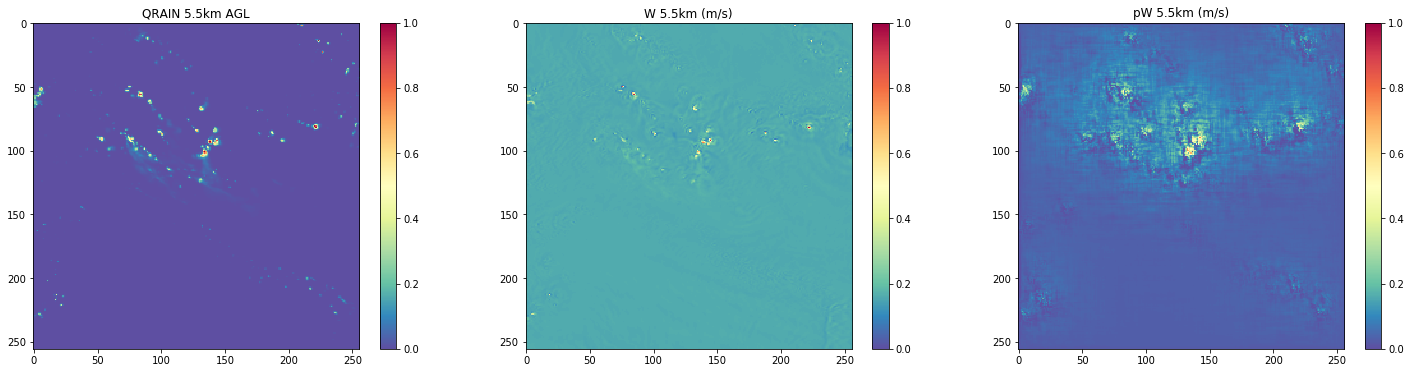

In [297]:
cmap = plt.cm.Spectral_r
plt.clf()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,6)) 

max_ref = np.amax(fi[:,:])
p_ref = np.percentile(fi[:,:], 99.9)

ref = ax1.imshow(fi, cmap=cmap)
#ax1.set_title("max QRAIN 0-6.5km AGL")
ax1.set_title("QRAIN 5.5km AGL")
#ref.set_clim(vmin=0, vmax=max_ref)
ref.set_clim()
fig.colorbar(ref, ax=ax1, orientation='vertical', label='')

max_maxW = np.amax(li[:,:])
min_maxW = np.amin(li[:,:])
p_maxW = np.percentile(li[:,:], 99.9)
pmin_maxW = np.percentile(li[:,:], 35.0)
print(min_maxW, max_maxW, pmin_maxW, p_maxW)

maxW = ax2.imshow(li, cmap=cmap)
ax2.set_title("W 5.5km (m/s)")
#maxW.set_clim(vmin=0, vmax=p_maxW)
maxW.set_clim()
fig.colorbar(maxW, ax=ax2)

min_pMaxW = np.amin(pi[:,:])
max_pMaxW = np.amax(pi[:,:])
p_pMaxW = np.percentile(pi[:,:], 99)
print(min_pMaxW)
print(max_pMaxW)
print(p_pMaxW)

pMaxW = ax3.imshow(pi, cmap=cmap)
ax3.set_title("pW 5.5km (m/s)")
pMaxW.set_clim(vmin=0, vmax=1)
#pMaxW.set_clim()
fig.colorbar(pMaxW, ax=ax3)

plt.savefig(model_run_dir + "/predict_comp_" + job_number + "_" + str(plt_number) + ".png")